# IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# LOADING AND READING THE DATASET

In [15]:
df = pd.read_csv("vehicle_manufacturing.csv.xls")
df

,Car ID,Brand,Model,Year,Color,Mileage,Price,Location
0,1,Toyota,Camry,2018,White,45000,18000,Los Angeles
1,2,Honda,Civic,2019,Blue,35000,16000,New York
2,3,Ford,Focus,2017,Silver,55000,14000,Chicago
3,4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
4,5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...,...
1995,1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1996,1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1997,1998,Honda,Fit,2018,Gray,50000,14000,Atlanta
1998,1999,Ford,Fusion,2017,White,55000,19000,Phoenix


In [18]:
df = pd.read_csv("vehicle_manufacturing.csv.xls", index_col='Car ID')
df

,Brand,Model,Year,Color,Mileage,Price,Location
Car ID,,,,,,,
1,Toyota,Camry,2018,White,45000,18000,Los Angeles
2,Honda,Civic,2019,Blue,35000,16000,New York
3,Ford,Focus,2017,Silver,55000,14000,Chicago
4,Chevrolet,Cruze,2016,Red,60000,12000,Miami
5,Hyundai,Elantra,2018,Black,40000,15000,San Francisco
...,...,...,...,...,...,...,...
1996,Hyundai,Palisade,2019,Silver,65000,22000,San Francisco
1997,Toyota,Sienna,2018,Red,55000,16000,Dallas
1998,Honda,Fit,2018,Gray,50000,14000,Atlanta


In [17]:
dataset = df.copy()

# ABOUT THE DATASET

In [19]:
print("no of rows and columns: ",df.shape)

no of rows and columns:  (2000, 7)


In [20]:
print("number of elements: ",df.size)

number of elements:  14000


In [21]:
df.columns

Index(['Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price', 'Location'], dtype='object')

**EACH FEATURE TELLS ABOUT:**

    'Car ID' : A unique identifier assigned to each car in your dataset.
    'Brand' : Represents the manufacturer or brand of the car.
    'Model' : Specifies the specific version or model name of the car within a brand.
    'Year' : Represents the manufacturing year of the car.
    'Color' : Indicates the color of the car.
    'Mileage' : Represents the total distance the car has traveled.
    'Price' : Indicates the cost or price associated with the car.
    'Location' : Specifies the location where the car is located or registered.   

In [9]:
df.dtypes

Car ID       int64
Brand       object
Model       object
Year         int64
Color       object
Mileage      int64
Price        int64
Location    object
dtype: object

# MISSING VALUES 

In [10]:
df.isna().sum()

Car ID      0
Brand       0
Model       0
Year        0
Color       0
Mileage     0
Price       0
Location    0
dtype: int64

- there is no missing values

# Exploratory Data Analysis (EDA)

In [25]:
print("    VEHICLE DATA    ".title())
print("--------------------------------")
print("The number of unique brands: ", df["Brand"].nunique())
print("The number of unique models: ", df["Model"].nunique())
print("The number of unique years: ", df["Year"].nunique())
print("The number of unique colors: ", df["Color"].nunique())
print("The number of unique locations: ", df["Location"].nunique())


    Vehicle Data    
--------------------------------
The number of unique brands:  5
The number of unique models:  68
The number of unique years:  6
The number of unique colors:  7
The number of unique locations:  10


In [26]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Brand,2000,5,Toyota,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,2000,68,Civic,109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2000.0,NaN,NaN,NaN,2017.4545,1.704812,2015.0,2016.0,2017.0,2019.0,2020.0
Color,2000,7,White,411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,2000.0,NaN,NaN,NaN,47452.5,11016.279906,25000.0,40000.0,50000.0,55000.0,70000.0
Price,2000.0,NaN,NaN,NaN,19605.0,4777.592249,12000.0,16000.0,19000.0,23000.0,29000.0
Location,2000,10,Los Angeles,246,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# df.describe().T

- There are 2000 records in the dataset 
- There are 5 unique brands with Toyota being the most frequent brand (438 times).
- There are 68 unique models and 'Civic' is the most common model (109 times).
- The cars manufactured between 2015 and 2020.
- Range of mileage : average of 47,452.5 miles.
- Prices range from  12,000 𝑡𝑜 29,000 with an average price of 19,605.
- There are 10 unique locations, and 'Los Angeles' is the most frequent location (246 times).

# UNIVARIABLE ANALYSIS

In [27]:
df.columns

Index(['Brand', 'Model', 'Year', 'Color', 'Mileage', 'Price', 'Location'], dtype='object')

##### Brand

In [29]:
brand_counts = df["Brand"].value_counts()

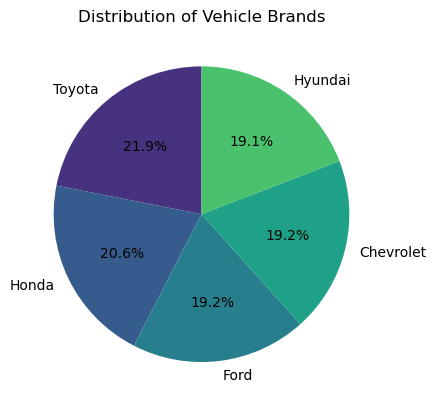

In [30]:
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Distribution of Vehicle Brands")
plt.show()

- Toyota has the highest count among the brands,followed by Honda, Ford, and Chevrolet,Hyundai

##### Year

In [34]:
years = df["Year"].value_counts()

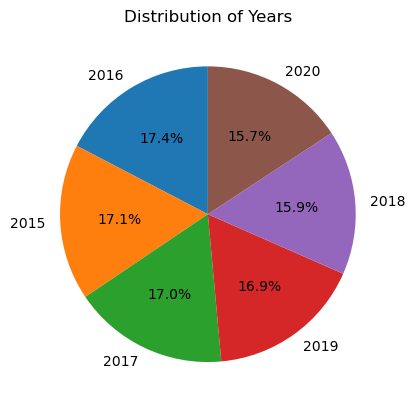

In [43]:
plt.pie(years,labels=years.index,autopct="%1.1f%%" ,startangle=90)
plt.title("Distribution of Years")
plt.show()

- The cars manufactured between 2015 and 2020.
- The number of cars is highest for the year 2016 followed by 2015 , 2017,2019,2018 and 2020
- The highest number of cars is recorded for the year 2016 because of the Economic factors, incentives, or market trends in 2016.

##### Model

In [48]:
df["Model"].nunique()

68

In [57]:
df["Model"].value_counts(ascending=True).head(10)

Rav31    1
Rav5     2
Rav6     2
Rav7     2
Rav8     2
Rav9     2
Rav10    2
Rav11    2
Rav12    2
Rav13    2
Name: Model, dtype: int64

In [55]:
df["Model"].value_counts().head(10)

Civic       109
Fusion       82
Camry        82
Cruze        55
Pilot        55
Malibu       55
Fit          55
Sienna       55
Palisade     55
Tahoe        55
Name: Model, dtype: int64

In [49]:
models_top = df["Model"].value_counts().head(10)

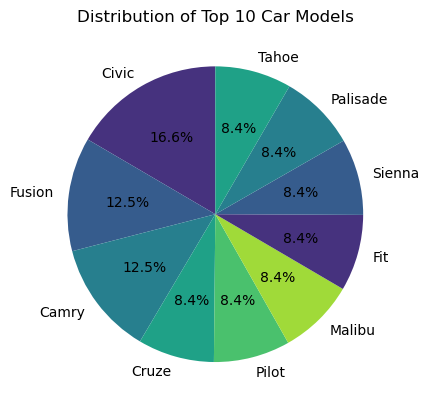

In [51]:
plt.pie(models_top, labels=models_top.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Distribution of Top 10 Car Models")
plt.show()

In [58]:
models_lowest = df["Model"].value_counts(ascending=True).head(10)

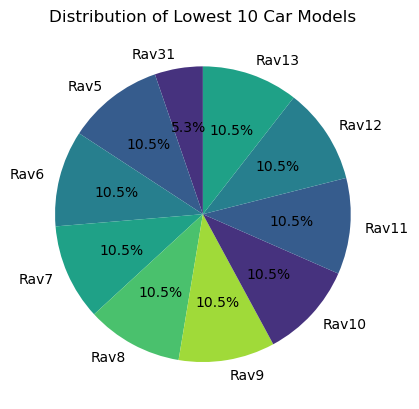

In [59]:
plt.pie(models_lowest, labels=models_lowest.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("viridis"))
plt.title("Distribution of Lowest 10 Car Models")
plt.show()

- "Civic" is the most frequently occurring vehicle model followed by "Fusion" and "Camry" 
- "Rav" models has two instances except for "Rav31," which has only one instance.

##### Color

In [60]:
df["Color"].nunique()

7

In [61]:
color = df["Color"].value_counts()

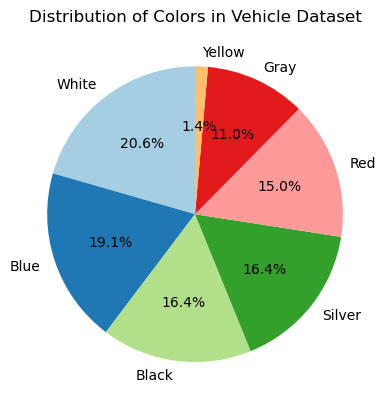

In [62]:
plt.pie(color, labels=color.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Colors in Vehicle Dataset')
plt.show()

- Neutral tones like white,blue, black, silver are among the top colors, which is typical in the automotive industry.
- Less common colors include Yellow,Red,Gray . 

##### Mileage

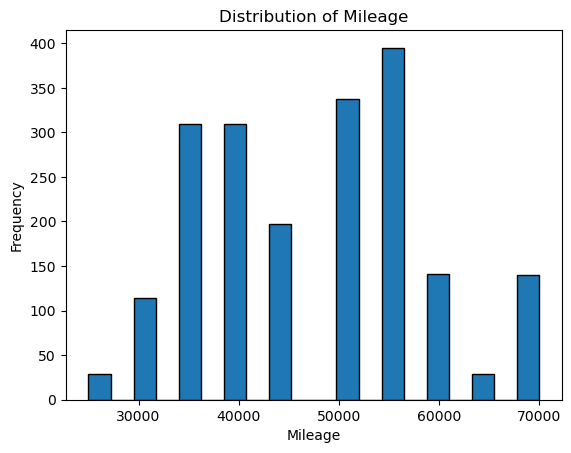

In [64]:
plt.hist(df["Mileage"], bins=20, edgecolor='black')
plt.title('Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

- The most common mileage levels for cars : 55,000 , 50,000 , 35,000 , and 40,000 . 
- There are fewer cars with extremely low or high mileage:65000,25000.

##### Price

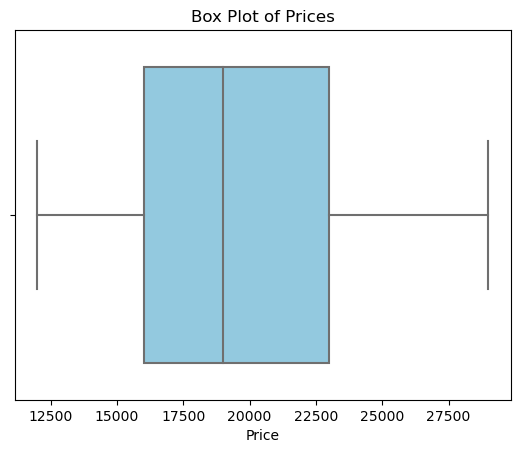

In [66]:
sns.boxplot(x=df['Price'], color='skyblue')
plt.title('Box Plot of Prices')
plt.xlabel('Price')
plt.show()

- Prices range from 12,000 𝑡𝑜 29,000

##### Location

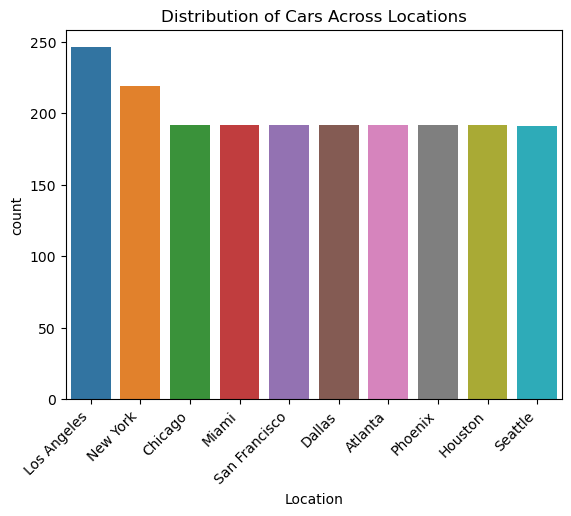

In [67]:
sns.countplot(x='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Distribution of Cars Across Locations')
plt.xticks(rotation=45, ha='right')
plt.show()

- The locations with the highest number of registered cars are Los Angeles , New York.
- The count of cars for each location appears consistent.

# MULTIVARIATE ANALYSIS
### (Explore relationships between variables)

In [70]:
df.corr()

,Year,Mileage,Price
Year,1.000000,-0.010104,-0.023274
Mileage,-0.010104,1.000000,-0.258460
Price,-0.023274,-0.258460,1.000000


<Axes: >

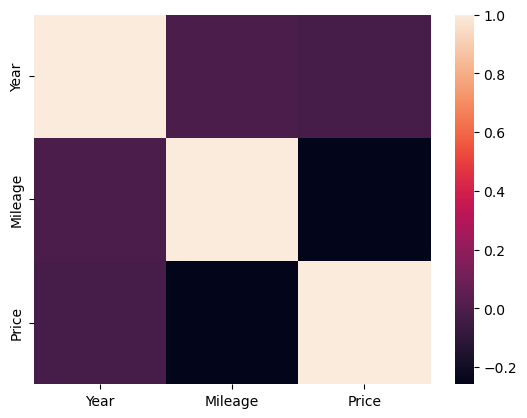

In [71]:
sns.heatmap(df.corr())

- There is a very weak negative correlation between the Year of the car and its Mileage.
- There is a very weak negative correlation between the Year of the car and its Price.
- There is a moderate negative correlation between Mileage and Price.

#### Average Price by Location and Brand

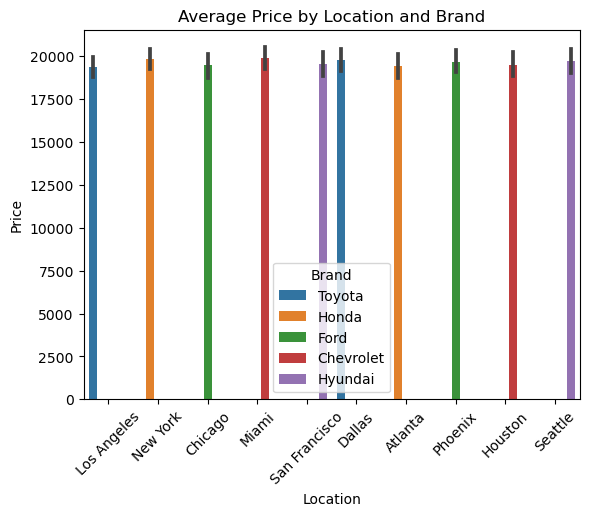

In [69]:
sns.barplot(x='Location', y='Price', hue='Brand', data=df)
plt.title('Average Price by Location and Brand')
plt.xticks(rotation=45)
plt.show()

- location and brand contribute to differences in car prices
- Market trends, economic factors, and consumer preferences in each location can also influence the average prices 
- Different models and trims can have varying price ranges
- Toyota have highest price in Los Angeles  and Dallas
- Honda have highest price in New York and Atlanta
- Ford  have highest price in Chicago and Phoenix 
- Chevrolet have highest price in Houston and Miami
- Hyundai have highest price in San Francisco and Seattle  

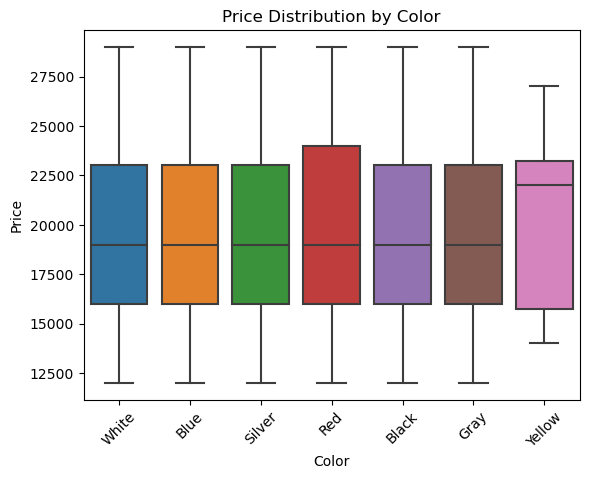

In [72]:
sns.boxplot(x='Color', y='Price', data=df)
plt.title('Price Distribution by Color')
plt.xticks(rotation=45)
plt.show()

- Colors like white,blue, black, silver,Gray have similar average price, and colors include Yellow,Red,have a little change in the price  hence it may sold comparatively less 

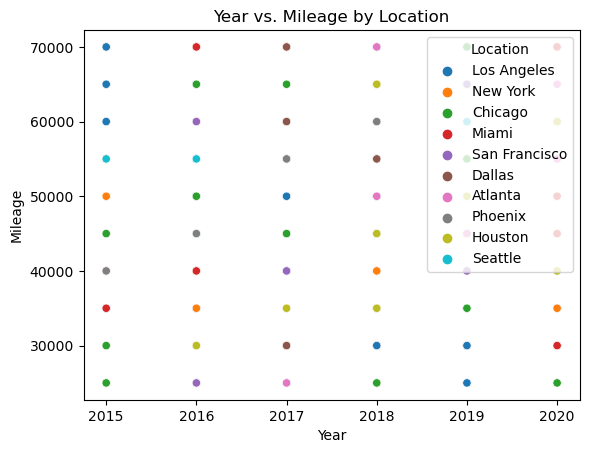

In [73]:
sns.scatterplot(x='Year', y='Mileage', hue='Location', data=df)
plt.title('Year vs. Mileage by Location')
plt.show()

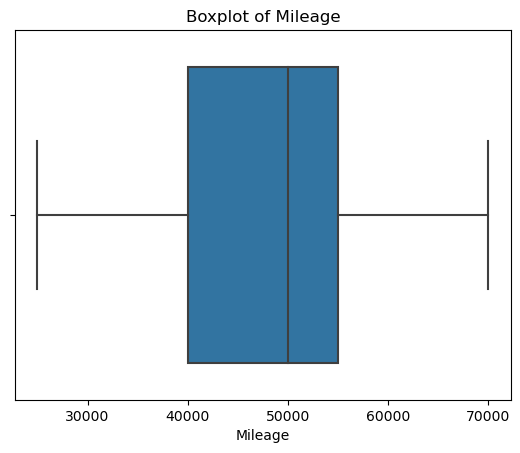

In [79]:
sns.boxplot(x='Mileage', data=df)
plt.title('Boxplot of Mileage')
plt.show()

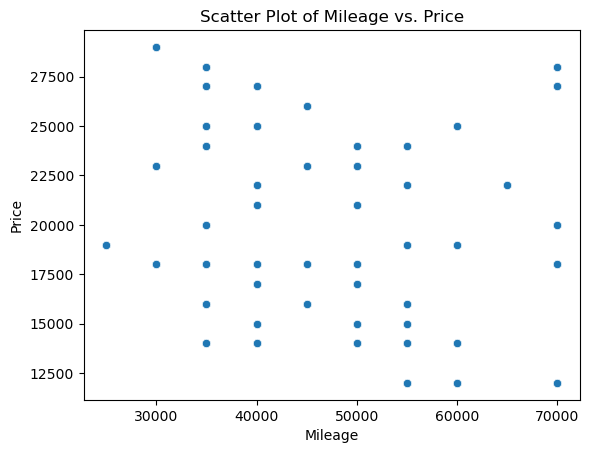

In [80]:
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title('Scatter Plot of Mileage vs. Price')
plt.show()

## Average Price over Years


In [83]:
average_price_by_year = df.groupby('Year')['Price'].mean()
average_price_by_year

Year
2015    19880.116959
2016    19610.951009
2017    19252.941176
2018    19883.280757
2019    19849.557522
2020    19136.507937
Name: Price, dtype: float64

From 2015 to 2020, average car prices remained relatively stable, with slight increases in 2018 and 2019 due to inflation, consumer preferences, and newer models. However, a dip in 2020 was observed, possibly due to economic conditions, external events, or more affordable models.

### Color preferences over years

In [86]:
color_preferences = df.groupby(['Year', 'Color'])['Brand'].count().unstack()
color_preferences

Color,Black,Blue,Gray,Red,Silver,White,Yellow
Year,,,,,,,
2015,57,74,42,41,49,71,8
2016,48,70,33,50,66,73,7
2017,55,70,38,58,50,66,3
2018,54,52,33,47,52,77,2
2019,53,71,38,51,59,63,4
2020,62,46,36,54,52,61,4


### Location-based analysis

In [87]:
location_trends = df.groupby('Location')['Price'].mean().sort_values(ascending=False)
location_trends

Location
Miami            19859.375000
New York         19812.785388
Dallas           19755.208333
Seattle          19717.277487
Phoenix          19671.875000
San Francisco    19541.666667
Houston          19500.000000
Chicago          19463.541667
Atlanta          19432.291667
Los Angeles      19341.463415
Name: Price, dtype: float64

- Car prices in Miami and Los Angeles are significantly influenced by color, with Miami having the highest average prices and Los Angeles having the lowest.
- consistency across colors, suggesting regional trends. 


### Location-based analysis

In [88]:
mileage_price_trend = df.groupby('Year')[['Mileage', 'Price']].mean()
mileage_price_trend

,Mileage,Price
Year,,
2015,47485.380117,19880.116959
2016,47953.890490,19610.951009
2017,47397.058824,19252.941176
2018,47570.977918,19883.280757
2019,46297.935103,19849.557522
2020,48047.619048,19136.507937


The average mileage and price of cars have slightly fluctuated over the years, with 2019 showing the lowest and 2016 the highest. There is an inverse relationship between the two, with older cars generally having higher mileage and lower prices. In recent years, both have shown relatively stable patterns.

# CONCLUSIONS:



    • 2000 records with 5 unique brands and 68 unique models.
    • Most common model is 'Civic' (438 times).
    • Cars manufactured between 2015 and 2020.
    • Average mileage: 47,452.5 miles.
    • Prices range from 12,000 𝑡𝑜 to 19,605.
    • Most frequent location is 'Los Angeles' (246 times).
    • Toyota, Honda, Ford, Chevrolet, and Hyundai are the most frequent brands.
    • Highest number of cars recorded in 2016 due to economic factors, incentives, or market trends.
    • Most common colors are neutral tones like white, blue, black, silver.
    • Most common mileage levels: 55,000, 50,000, 35,000, and 40,000.
    • Locations with highest registered cars are Los Angeles, New York.
    • Car prices vary based on location, brand, market trends, economic factors, and consumer preferences.
    • Car prices in Miami and Los Angeles are significantly influenced by color.
    • Average mileage and price have slightly fluctuated over the years, with 2019 showing the lowest and 2016 the highest.